[[0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   1.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.25 0.   0.  ]
 [0.   0.   1.   0.   0.   1.   0.   0.  ]
 [0.   0.   1.   0.   0.   1.   0.25 0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]]
[[-1.   -1.    0.    0.75  1.    0.25]
 [-2.   -1.    1.   -0.25  1.    1.25]
 [-3.    0.    3.   -2.25 -0.25  2.25]
 [-3.    0.    3.   -2.   -0.25  2.  ]
 [-3.    0.    3.   -1.   -0.25  1.  ]
 [-2.    0.    2.    0.    0.    0.  ]]


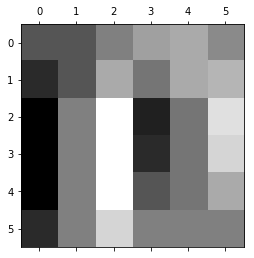

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import convolve

input_image = np.array([[0, 0, 1, 1, 0, 0], 
                        [0, 1, 0, 0, 0.25, 0], 
                        [0, 1, 0, 0, 1, 0], 
                        [0, 1, 0, 0, 1, 0.25], 
                        [0, 1, 0, 0, 0, 0], 
                        [0, 1, 0, 0, 0, 0]])
kernel = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])

input_padded = np.zeros([8, 8])
input_padded[1:7, 1:7] = input_image[:, :]
print(input_padded)

output = convolve(input_image, kernel, mode='constant', cval=0.0)

print(output)
plt.matshow(output, cmap='gray')
plt.show()

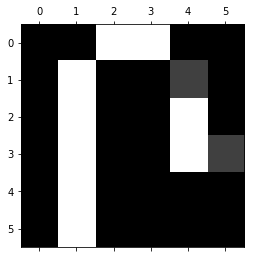

In [2]:
plt.matshow(input_image, cmap='gray')

In [3]:
import tensorflow as tf
tf.enable_eager_execution()
tf.executing_eagerly()

True

In [4]:
init = tf.constant(kernel)

In [12]:
output_tf = tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), 
                                   padding='same',
                                   strides=(1, 1),
                                   use_bias=False,
                                   kernel_initializer=tf.constant_initializer(kernel))(input_image.reshape(1, 6, 6, 1))

In [15]:
print(output_tf.numpy().reshape(6, 6))
print(output)

[[ 1.    1.    0.   -0.75 -1.   -0.25]
 [ 2.    1.   -1.    0.25 -1.   -1.25]
 [ 3.    0.   -3.    2.25  0.25 -2.25]
 [ 3.    0.   -3.    2.    0.25 -2.  ]
 [ 3.    0.   -3.    1.    0.25 -1.  ]
 [ 2.    0.   -2.    0.    0.    0.  ]]
[[-1.   -1.    0.    0.75  1.    0.25]
 [-2.   -1.    1.   -0.25  1.    1.25]
 [-3.    0.    3.   -2.25 -0.25  2.25]
 [-3.    0.    3.   -2.   -0.25  2.  ]
 [-3.    0.    3.   -1.   -0.25  1.  ]
 [-2.    0.    2.    0.    0.    0.  ]]


In [19]:
pool_tf = tf.keras.layers.MaxPool2D(strides=(2,2), padding='same')(output_tf)
print(pool_tf.numpy().reshape(3, 3))

[[ 2.    0.25 -0.25]
 [ 3.    2.25  0.25]
 [ 3.    1.    0.25]]


In [20]:
pool_tf = tf.keras.layers.MaxPool2D(strides=(2,2), padding='valid')(output_tf)
print(pool_tf.numpy().reshape(3, 3))

[[ 2.    0.25 -0.25]
 [ 3.    2.25  0.25]
 [ 3.    1.    0.25]]
